In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sales.csv")

In [3]:
df

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,A,New York,Member,Female,Shampoo,Stationery,1.55,11,1.19,18.24,1
996,997,A,New York,Member,Male,Detergent,Personal Care,2.44,7,1.20,18.28,1
997,998,A,New York,Member,Female,Shampoo,Stationery,17.92,2,2.51,38.35,3
998,999,A,New York,Member,Female,Shampoo,Beverages,17.41,4,4.87,74.51,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [5]:
df.shape

(1000, 12)

In [7]:
#Dataset as no missing values
#The sale_id column needs to be dropped
df.drop(columns=["sale_id"], inplace=True)
df.head()

,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


In [10]:
# Quick dataset overview
df.shape

(1000, 11)

In [22]:
for column in df.columns:
    if df[column].dtype == 'object':
        unq = df[column].unique()
        print(column)
        print(unq)

branch
['A' 'B']
city
['New York' 'Los Angeles' 'Chicago']
customer_type
['Member' 'Normal']
gender
['Male' 'Female']
product_name
['Shampoo' 'Notebook' 'Apple' 'Detergent' 'Orange Juice']
product_category
['Personal Care' 'Stationery' 'Fruits' 'Household' 'Beverages']


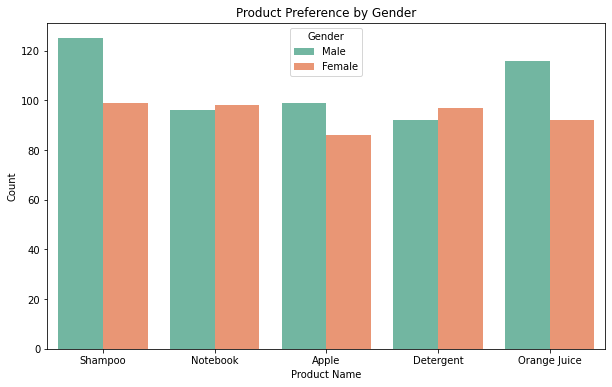


Percentage Distribution of Product Preference by Gender:
gender           Female       Male
product_name                      
Apple         46.486486  53.513514
Detergent     51.322751  48.677249
Notebook      50.515464  49.484536
Orange Juice  44.230769  55.769231
Shampoo       44.196429  55.803571


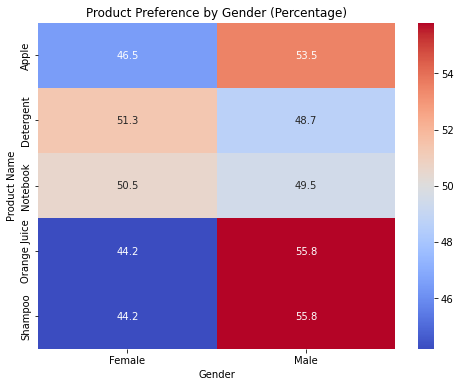

In [25]:
# Count plot for Product_Name distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='product_name', hue='gender', data=df, palette='Set2')
plt.title('Product Preference by Gender')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Create a pivot table to compute product preferences by gender
product_pivot = pd.crosstab(df['product_name'], df['gender'], normalize='index') * 100
print("\nPercentage Distribution of Product Preference by Gender:")
print(product_pivot)

# Heatmap to visualize percentage preferences
plt.figure(figsize=(8, 6))
sns.heatmap(product_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Product Preference by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Product Name')
plt.show()


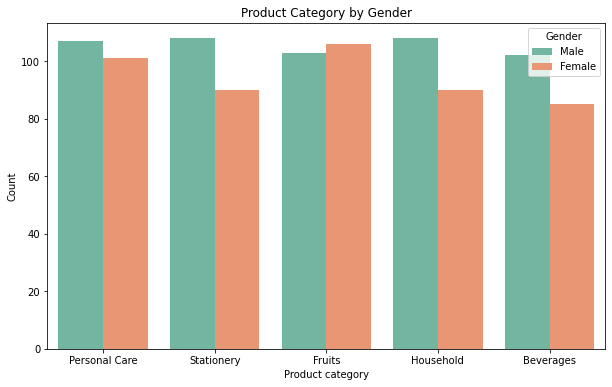


Percentage Distribution of Product Preference by Gender:
gender               Female       Male
product_category                      
Beverages         45.454545  54.545455
Fruits            50.717703  49.282297
Household         45.454545  54.545455
Personal Care     48.557692  51.442308
Stationery        45.454545  54.545455


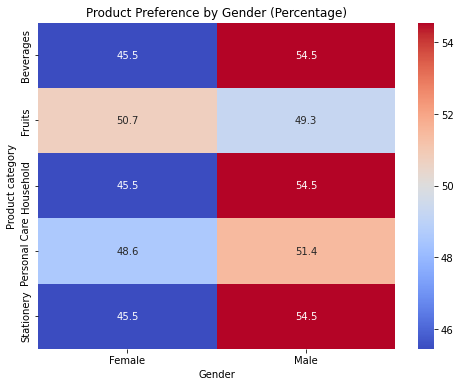

In [26]:
# Count plot for Product_category distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', hue='gender', data=df, palette='Set2')
plt.title('Product Category by Gender')
plt.xlabel('Product category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Create a pivot table to compute product preferences by gender
product_pivot = pd.crosstab(df['product_category'], df['gender'], normalize='index') * 100
print("\nPercentage Distribution of Product Preference by Gender:")
print(product_pivot)

# Heatmap to visualize percentage preferences
plt.figure(figsize=(8, 6))
sns.heatmap(product_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Product Preference by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Product category')
plt.show()


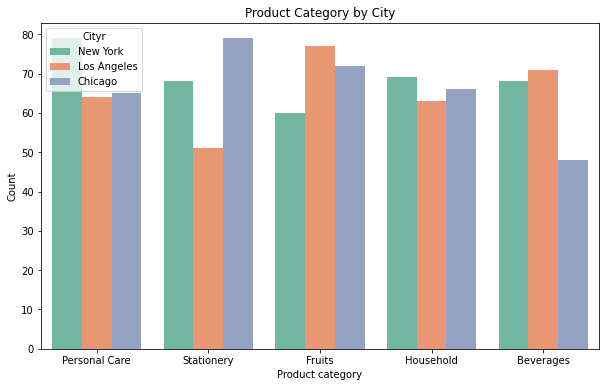


Percentage Distribution of Product Preference by City:
city                Chicago  Los Angeles   New York
product_category                                   
Beverages         25.668449    37.967914  36.363636
Fruits            34.449761    36.842105  28.708134
Household         33.333333    31.818182  34.848485
Personal Care     31.250000    30.769231  37.980769
Stationery        39.898990    25.757576  34.343434


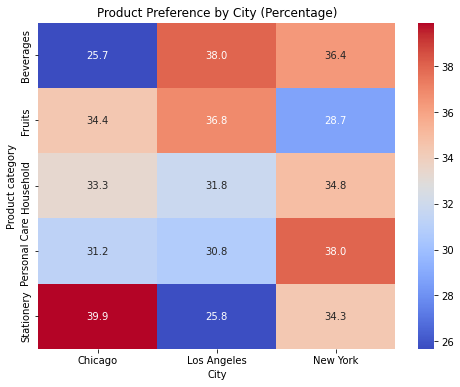

In [36]:
# Count plot for Product_category distribution by City
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', hue='city', data=df, palette='Set2')
plt.title('Product Category by City')
plt.xlabel('Product category')
plt.ylabel('Count')
plt.legend(title='Cityr')
plt.show()

# Create a pivot table to compute product preferences by City
product_pivot = pd.crosstab(df['product_category'], df['city'], normalize='index') * 100
print("\nPercentage Distribution of Product Preference by City:")
print(product_pivot)

# Heatmap to visualize percentage preferences
plt.figure(figsize=(8, 6))
sns.heatmap(product_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Product Preference by City (Percentage)')
plt.xlabel('City')
plt.ylabel('Product category')
plt.show()

Total Sales Per Branch:
  Branch  Total Sales
0      A     82811.64
1      B     35772.26


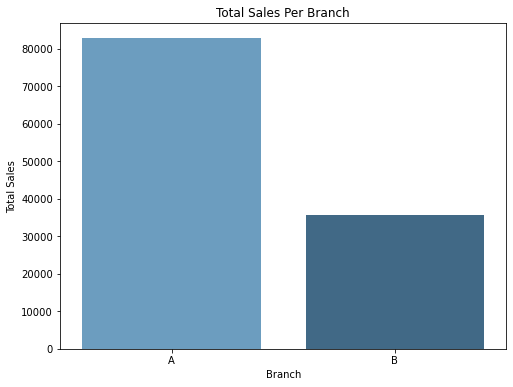

In [27]:
# Calculate total sales per branch
sales_per_branch = df.groupby('branch')['total_price'].sum().reset_index()

# Rename columns for clarity
sales_per_branch.columns = ['Branch', 'Total Sales']

# Print the total sales per branch
print("Total Sales Per Branch:")
print(sales_per_branch)

# Bar plot to visualize sales per branch
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Total Sales', data=sales_per_branch, palette='Blues_d')
plt.title('Total Sales Per Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()


Total Sales Per City:
          City  Total Sales
0      Chicago     42584.71
1  Los Angeles     35772.26
2     New York     40226.93


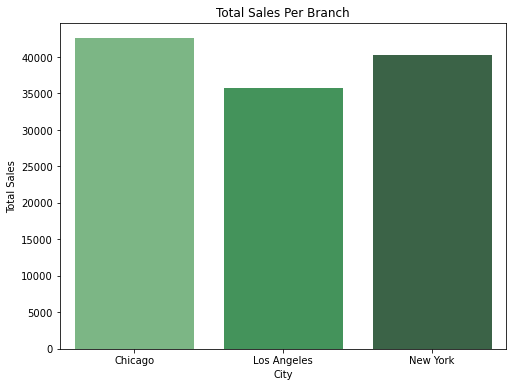

In [35]:
# Calculate total sales per city
sales_per_city = df.groupby('city')['total_price'].sum().reset_index()

# Rename columns for clarity
sales_per_city.columns = ['City', 'Total Sales']

# Print the total sales per branch
print("Total Sales Per City:")
print(sales_per_city)

# Bar plot to visualize sales per branch
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Total Sales', data=sales_per_city, palette='Greens_d')
plt.title('Total Sales Per Branch')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


Total Sales Per customer type:
  Customer_Type  Total Sales
0        Member     63213.63
1        Normal     55370.27


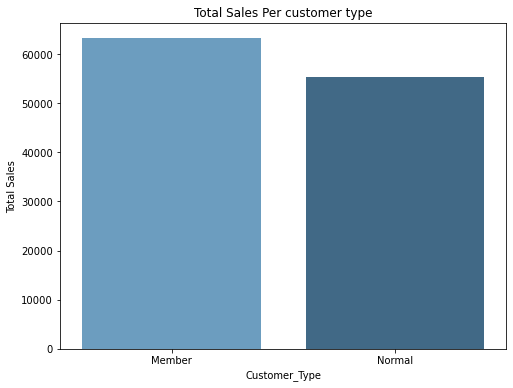

In [30]:
# Calculate total sales per type of customer_type
sales_per_customer_type = df.groupby('customer_type')['total_price'].sum().reset_index()

# Rename columns for clarity
sales_per_customer_type.columns = ['Customer_Type', 'Total Sales']

# Print the total sales per branch
print("Total Sales Per customer type:")
print(sales_per_customer_type)

# Bar plot to visualize sales per branch
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer_Type', y='Total Sales', data=sales_per_customer_type, palette='Blues_d')
plt.title('Total Sales Per customer type')
plt.xlabel('Customer_Type')
plt.ylabel('Total Sales')
plt.show()

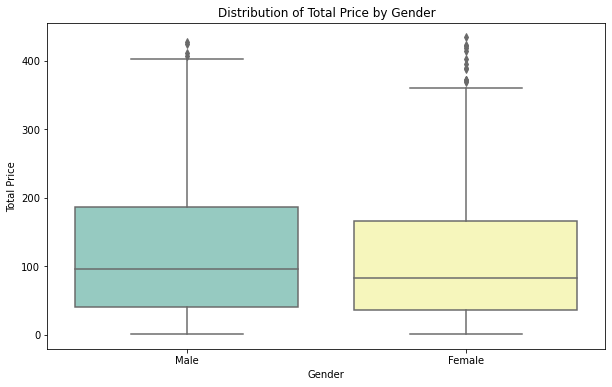

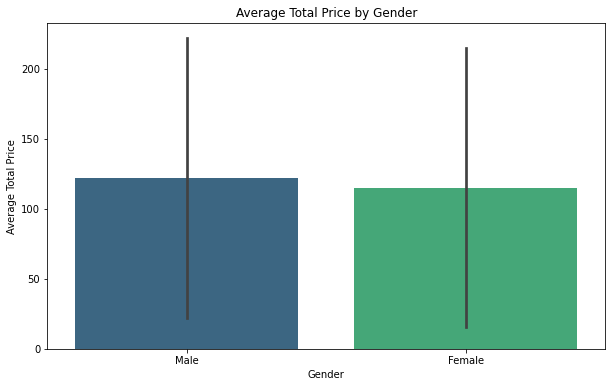

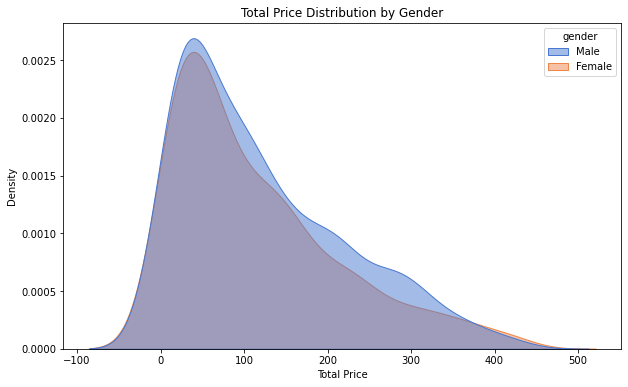

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show distribution of Total_Price by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='total_price', data=df, palette='Set3')
plt.title('Distribution of Total Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Price')
plt.show()

# Bar plot to show average Total_Price by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='total_price', data=df, ci='sd', palette='viridis')
plt.title('Average Total Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Price')
plt.show()

# KDE Plot to compare Total_Price distribution for different genders
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='total_price', hue='gender', fill=True, palette='muted', alpha=0.5)
plt.title('Total Price Distribution by Gender')
plt.xlabel('Total Price')
plt.ylabel('Density')
plt.show()


In [11]:
#EXPLORATORY DATA ANALYSIS
df.describe()

,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.836110,10.337000,7.758010,118.583900,6.057000
std,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.020000,1.000000,0.080000,1.210000,0.000000
25%,5.867500,5.000000,2.510000,38.380000,0.000000
50%,10.615000,10.000000,5.870000,89.705000,0.000000
75%,15.882500,16.000000,11.522500,176.072500,10.000000
max,20.980000,20.000000,28.390000,433.990000,43.000000


In [43]:
#Building regression models and comparing their performance.
# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# For training the Linear Regression model
from sklearn.linear_model import LinearRegression

# For regression


# For evaluating the model
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error

In [44]:
#Label encoding for categorical fields
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['branch',"city","customer_type","gender","product_name","product_category"]

# Apply Label Encoding to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [46]:
df.head()

,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,0,2,0,1,4,3,5.50,3,1.16,17.66,1
1,1,1,1,0,2,4,2.75,10,1.93,29.43,0
2,0,2,0,0,0,1,1.20,15,1.26,19.26,1
3,0,0,1,1,1,2,7.80,5,2.73,41.73,0
4,1,1,0,0,3,0,3.50,7,1.72,26.22,2


In [49]:
X = df.drop(columns=["total_price"])
y = df["total_price"]

In [50]:
X.head()

,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,reward_points
0,0,2,0,1,4,3,5.50,3,1.16,1
1,1,1,1,0,2,4,2.75,10,1.93,0
2,0,2,0,0,0,1,1.20,15,1.26,1
3,0,0,1,1,1,2,7.80,5,2.73,0
4,1,1,0,0,3,0,3.50,7,1.72,2


In [51]:
y.head()

0    17.66
1    29.43
2    19.26
3    41.73
4    26.22
Name: total_price, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [71]:
rf_model2 = GradientBoostingRegressor(n_estimators=100, random_state=47)

In [72]:
rf_model2.fit(X_train_scaled,y_train)

GradientBoostingRegressor(random_state=47)

In [55]:
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_prediction = rf_model.predict(X_test_scaled)

In [73]:
y_pred = rf_model2.predict(X_test_scaled)

In [58]:
mse1 = mean_squared_error(y_test,y_prediction)
r21 = r2_score(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)


In [74]:
mse_2 = mean_squared_error(y_test,y_pred)
mae_2 = mean_absolute_error(y_test,y_pred)
r21_2 = r2_score(y_test,y_pred)

In [68]:
print("MSE : ", mse1,"R Squared : ",r21,"Mean Absolute Error : ", mae)

MSE :  1.1038408967000375 R Squared :  0.9999014379090261 Mean Absolute Error :  0.4166570000000164


In [80]:
print("Results for Gradient Boosting Regressor")
print("MSE : ", mse_2,"R Squared : ",r21_2,"Mean Absolute Error : ", mae_2)

Results for Gradient Boosting Regressor
MSE :  1.471515617610367 R Squared :  0.9998686081874607 Mean Absolute Error :  0.7361808671076414


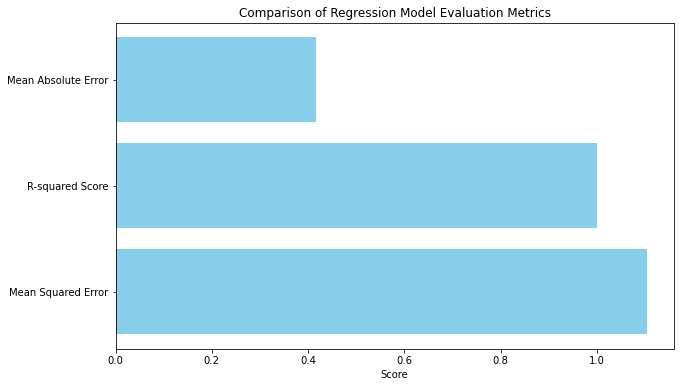

In [59]:
# Create a DataFrame to hold the metrics
metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared Score', 'Mean Absolute Error'],
    'Value': [mse1, r21, mae]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(metrics['Metric'], metrics['Value'], color='skyblue')
plt.xlabel('Score')
plt.title('Comparison of Regression Model Evaluation Metrics')
plt.show()


In [69]:
import pandas as pd

# Assuming y_test and y_pred are already defined
# Convert y_test to a DataFrame and reset the index for alignment
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_prediction, columns=['Predicted'])

# Combine the two DataFrames
results_df = pd.concat([y_test_df, y_pred_df], axis=1)
results_df.columns = ['Actual', 'Predicted']

print(results_df)

     Actual  Predicted
0    389.63   397.0232
1     67.97    67.8872
2     31.84    31.6236
3     49.08    49.1127
4     41.47    41.6239
..      ...        ...
195   38.78    38.8449
196   82.09    82.4765
197   65.24    65.1221
198   82.82    82.9660
199  166.90   167.1060

[200 rows x 2 columns]


In [70]:
results_df.head()

,Actual,Predicted
0,389.63,397.0232
1,67.97,67.8872
2,31.84,31.6236
3,49.08,49.1127
4,41.47,41.6239


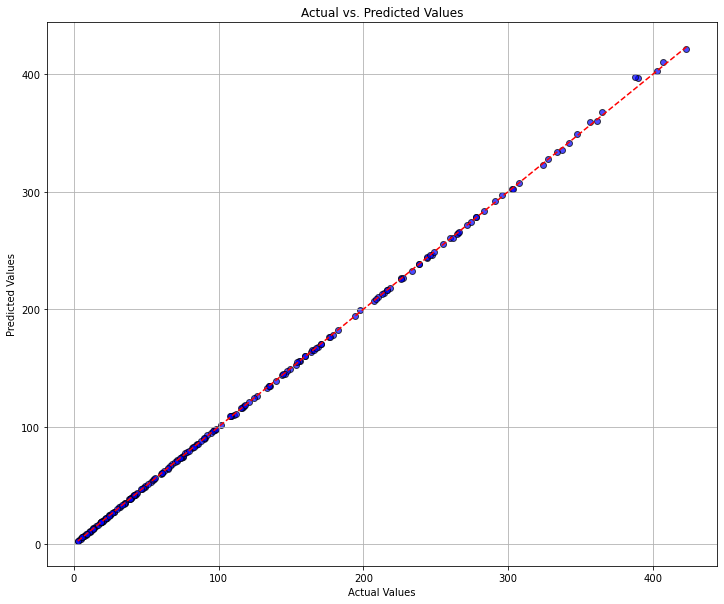

In [63]:

# Create a scatter plot to compare results
plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_prediction, color='blue', edgecolor='black', alpha=0.7)

# Plot a 45-degree line (ideal prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.grid(True)
plt.show()



In [83]:
# Comparing the result of the two models
#Create a DataFrame to hold the metrics


# Create a DataFrame to display the metrics
metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared Score', 'Mean Absolute Error'],
    'Model 1': [mse1, r21, mae],
    'Model 2': [mse_2, r21_2, mae_2]
})

print(metrics)




                Metric   Model 1   Model 2
0   Mean Squared Error  1.103841  1.471516
1      R-squared Score  0.999901  0.999869
2  Mean Absolute Error  0.416657  0.736181


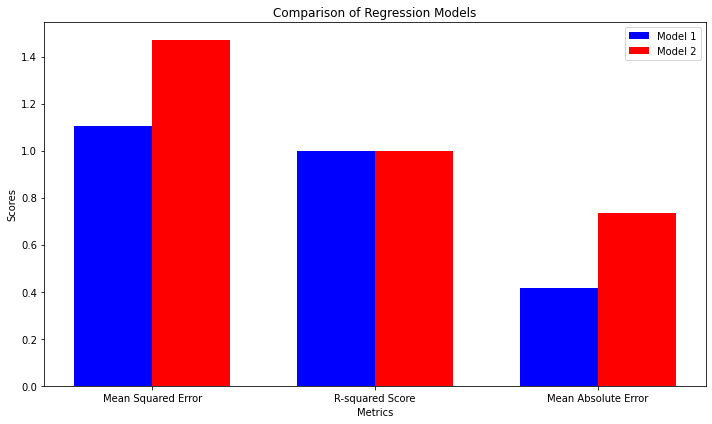

In [85]:
# Set the position of the bars on the x-axis
import numpy as np
bar_width = 0.35
index = np.arange(len(metrics))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Model 1 and Model 2
bar1 = ax.bar(index, metrics['Model 1'], bar_width, label='Model 1', color='b')
bar2 = ax.bar(index + bar_width, metrics['Model 2'], bar_width, label='Model 2', color='r')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics['Metric'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
